## 📊 Notebook 2: Análisis exploratorio de datos (EDA)

En esta notebook se lleva a cabo un análisis exploratorio de las reseñas procesadas. Se examina la distribución de calificaciones, la evolución temporal de los comentarios, patrones de longitud en los textos y otras variables relevantes. Este paso permite obtener una primera comprensión de la estructura de los datos y guiar futuras decisiones analíticas.

### 📥 Carga de datos procesados

En esta sección se carga el dataset previamente limpiado y unificado durante la etapa de preprocesamiento. El archivo incluye reseñas de productos (Samsung A15 y Motorola G32), junto con sus calificaciones, fechas y textos normalizados. Esto permitirá realizar un análisis exploratorio confiable sobre los patrones de opinión de los usuarios.

In [4]:
# Imports necesarios para el análisis exploratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualizaciones
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [5]:
# Cargar datos limpios desde la etapa de preprocesamiento
df_total = pd.read_csv("../data/processed/reviews_unificado.csv", parse_dates=['date'])

# Vista general del DataFrame
print("📊 Información general del dataset:")
print(f"Total de reseñas: {len(df_total)}")
print(f"Productos analizados: {df_total['producto'].unique()}")
print(f"Período temporal: {df_total['date'].min()} a {df_total['date'].max()}")

df_total.head()

📊 Información general del dataset:
Total de reseñas: 1085
Productos analizados: ['Samsung A15' 'Motorola G32']
Período temporal: 2022-12-28 00:00:00 a 2025-04-30 00:00:00


,text,rating,date,useful_votes,producto,text_clean,text_length,year_month
0,El celular es precioso! se lo regale a mi mamá...,5,2024-09-19,433,Samsung A15,el celular es precioso se lo regale a mi mama ...,114,2024-09
1,Súper lindo el celu muy recomendado.,5,2024-07-11,94,Samsung A15,super lindo el celu muy recomendado,6,2024-07
2,"Esta muy lindo. La cámara linda ,la batería du...",5,2024-08-26,94,Samsung A15,esta muy lindo la camara linda la bateria dura...,32,2024-08
3,"Realmente el producto me encantó,publico algun...",5,2024-10-22,72,Samsung A15,realmente el producto me encantopublico alguna...,119,2024-10
4,Desde que conocí samsung no deje de usar desde...,5,2024-10-07,52,Samsung A15,desde que conoci samsung no deje de usar desde...,54,2024-10


## 1. Distribución temporal de las reseñas

### 🗓️ Volumen mensual de reseñas publicadas

Visualización de la cantidad de reseñas a lo largo del tiempo. Esto permite detectar tendencias o picos de interés por los productos.

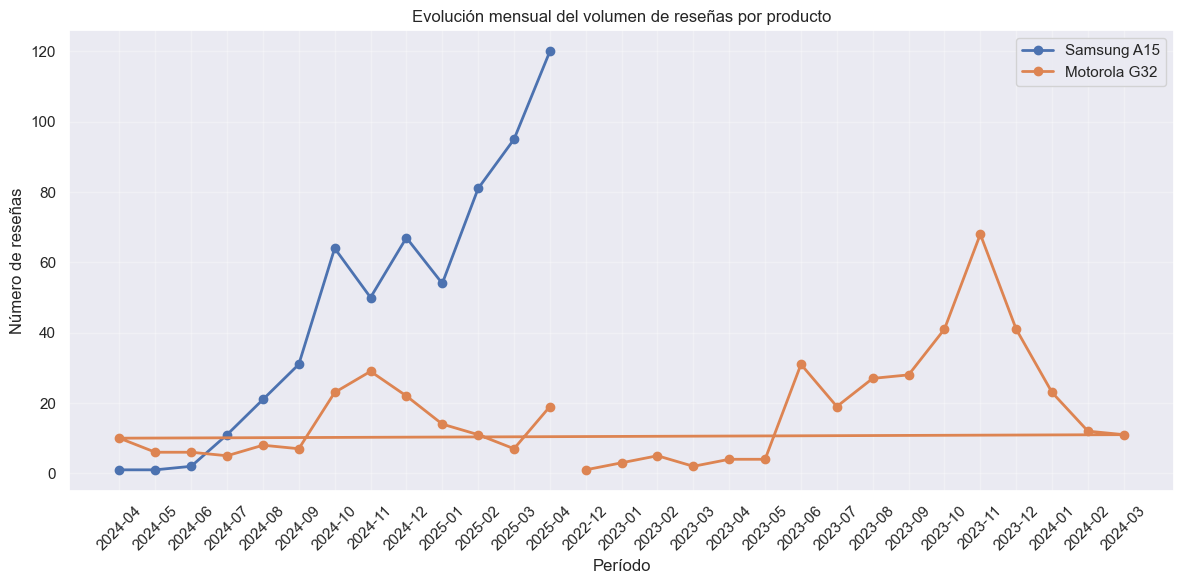

In [6]:
# Agrupación mensual por producto
monthly_counts = df_total.groupby(['year_month', 'producto']).size().reset_index(name='count')

# Visualización
plt.figure(figsize=(12, 6))
for producto in df_total['producto'].unique():
    data = monthly_counts[monthly_counts['producto'] == producto]
    plt.plot(data['year_month'].astype(str), data['count'], 
             marker='o', linewidth=2, label=producto)

plt.title('Evolución mensual del volumen de reseñas por producto')
plt.xlabel('Período')
plt.ylabel('Número de reseñas')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_volumen_mensual_resenas.png', dpi=300, bbox_inches='tight')
plt.show()

## 2. Distribución y evolución temporal de las calificaciones

### 📊 Proporción de ratings por producto

Este gráfico de barras muestra la distribución relativa de calificaciones (ratings) dentro de cada producto. A diferencia de los conteos absolutos, aquí cada barra representa la proporción de reseñas con determinado puntaje sobre el total de reseñas de ese producto, lo cual permite una comparación más justa entre productos con diferente volumen de opiniones.

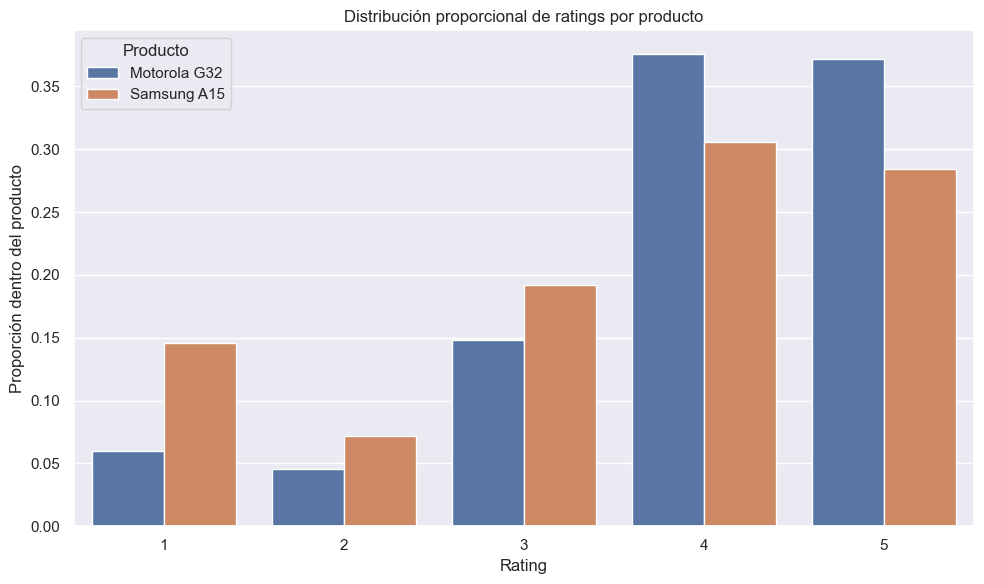

In [7]:
# Calcular proporciones de ratings por producto
rating_proportions = (
    df_total
    .groupby('producto', observed=False)['rating']
    .value_counts(normalize=True)
    .rename('proportion')
    .reset_index()
)

# Visualización
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rating_proportions,
    x='rating',
    y='proportion',
    hue='producto'
)

plt.title("Distribución proporcional de ratings por producto")
plt.xlabel("Rating")
plt.ylabel("Proporción dentro del producto")
plt.legend(title='Producto')
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_ratings_por_productos.png', dpi=300, bbox_inches='tight')
plt.show()

### 📊 Evolución temporal de las calificaciones

Este gráfico muestra la evolución mensual de la calificación promedio otorgada por los usuarios para cada producto. Permite identificar posibles tendencias en la percepción del producto, como mejoras o deterioros en la experiencia de uso reportada.

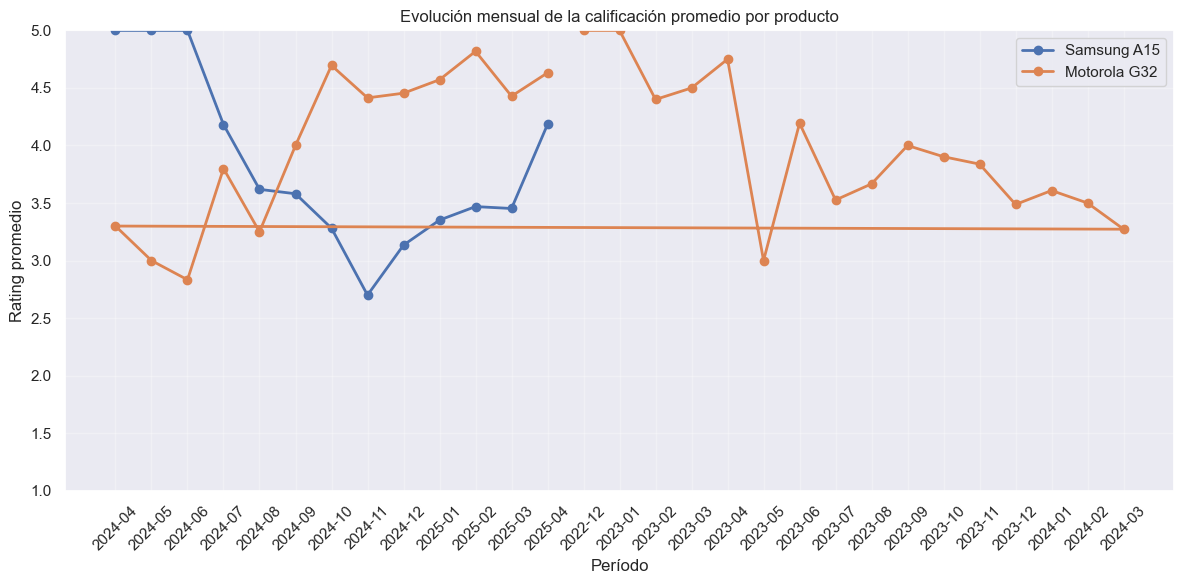

In [8]:
# Calificación promedio mensual por producto
monthly_ratings = df_total.groupby(['year_month', 'producto'])['rating'].mean().reset_index()

# Visualización
plt.figure(figsize=(12, 6))
for producto in df_total['producto'].unique():
    data = monthly_ratings[monthly_ratings['producto'] == producto]
    plt.plot(data['year_month'].astype(str), data['rating'], 
             marker='o', linewidth=2, label=producto)

plt.title('Evolución mensual de la calificación promedio por producto')
plt.xlabel('Período')
plt.ylabel('Rating promedio')
plt.ylim(1, 5)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_evolucion_ratings.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Análisis de longitud de las reseñas

### 📏 Relación entre calificación y longitud del texto

Análisis de la relación entre la calificación otorgada y la extensión de la reseña. Esto puede revelar patrones en el comportamiento discursivo de los usuarios según su nivel de satisfacción.

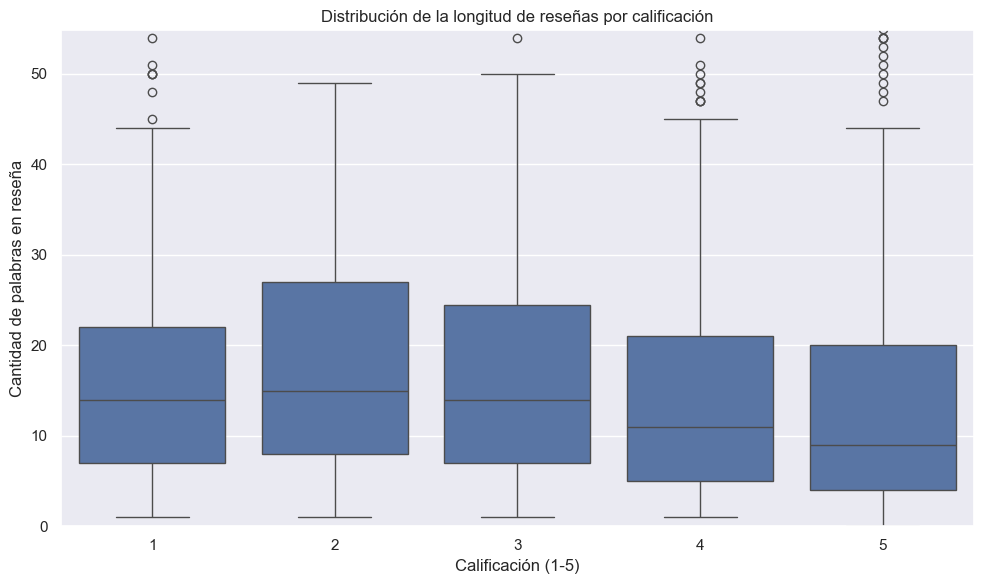

In [9]:
# Calcular longitud en palabras
df_total['word_count'] = df_total['text_clean'].fillna('').str.split().str.len()

# Visualización: boxplot de longitud por rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_total, x='rating', y='word_count')

plt.title("Distribución de la longitud de reseñas por calificación")
plt.xlabel("Calificación (1-5)")
plt.ylabel("Cantidad de palabras en reseña")
plt.xticks(range(5), [1, 2, 3, 4, 5])

# Limitar outliers extremos para mejor visualización
plt.ylim(0, df_total['word_count'].quantile(0.95))

plt.tight_layout()
plt.savefig('../outputs/visualizations/01_grafico_longitud_por_rating.png', dpi=300, bbox_inches='tight')
plt.show()

### 📈 Evolución temporal de la longitud promedio

Análisis de cómo ha cambiado la longitud promedio de las reseñas a lo largo del tiempo para cada producto.

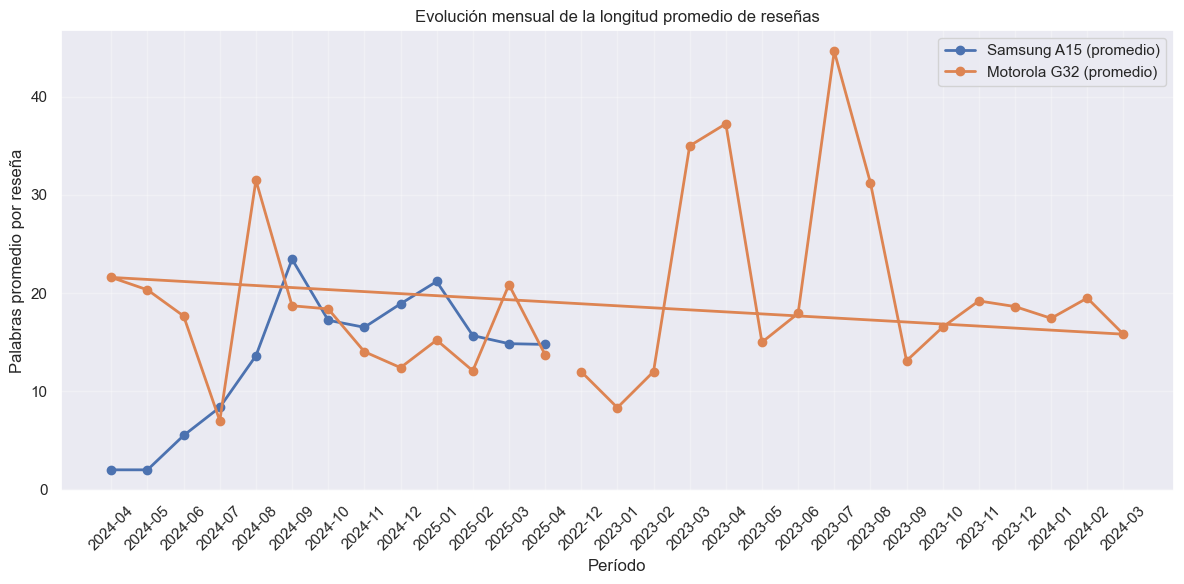

In [10]:
# Estadísticas mensuales de longitud por producto
monthly_length = df_total.groupby(['year_month', 'producto'])['word_count'].agg([
    'mean', 'median', 'std', 'count'
]).reset_index()

# Visualización de evolución de longitud promedio
plt.figure(figsize=(12, 6))
for producto in df_total['producto'].unique():
    data = monthly_length[monthly_length['producto'] == producto]
    plt.plot(data['year_month'].astype(str), data['mean'], 
             marker='o', linewidth=2, label=f'{producto} (promedio)')

plt.title('Evolución mensual de la longitud promedio de reseñas')
plt.xlabel('Período')
plt.ylabel('Palabras promedio por reseña')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_evolucion_longitud.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Análisis de votos útiles

### 👍 Distribución de votos útiles por producto

Análisis de los patrones de interacción con el sistema de votos útiles, lo que puede indicar el nivel de engagement y la utilidad percibida de las reseñas.

📊 Estadísticas de votos útiles:
count    1085.000000
mean        4.490323
std        28.976437
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       617.000000
Name: useful_votes, dtype: float64


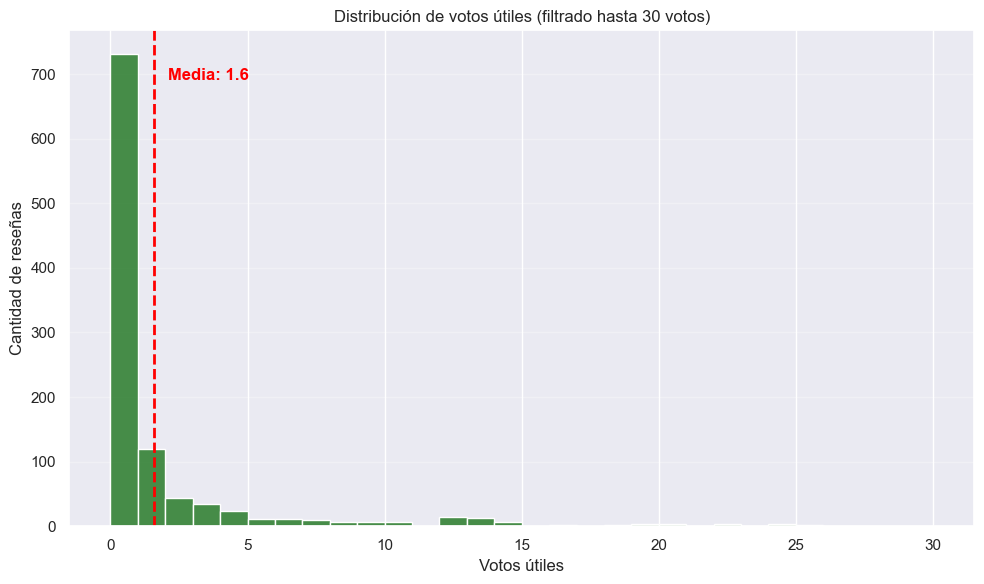

In [11]:
# Estadísticas básicas de votos útiles
print("📊 Estadísticas de votos útiles:")
print(df_total['useful_votes'].describe())

# Filtrar para visualización (eliminar outliers extremos)
df_filtered = df_total[df_total['useful_votes'] <= 30]

# Visualización: distribución general
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_filtered,
    x='useful_votes',
    bins=30,
    color='darkgreen',
    edgecolor='white',
    alpha=0.7
)

# Añadir línea de media
mean_votes = df_filtered['useful_votes'].mean()
plt.axvline(mean_votes, color='red', linestyle='--', linewidth=2)
plt.text(mean_votes + 0.5, plt.ylim()[1] * 0.9, 
         f'Media: {mean_votes:.1f}', color='red', fontweight='bold')

plt.title('Distribución de votos útiles (filtrado hasta 30 votos)')
plt.xlabel('Votos útiles')
plt.ylabel('Cantidad de reseñas')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_distribucion_votos_utiles.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/xj/bjstjydx13sdd594_hv58l2w0000gn/T/ipykernel_37621/2582621416.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Producto')


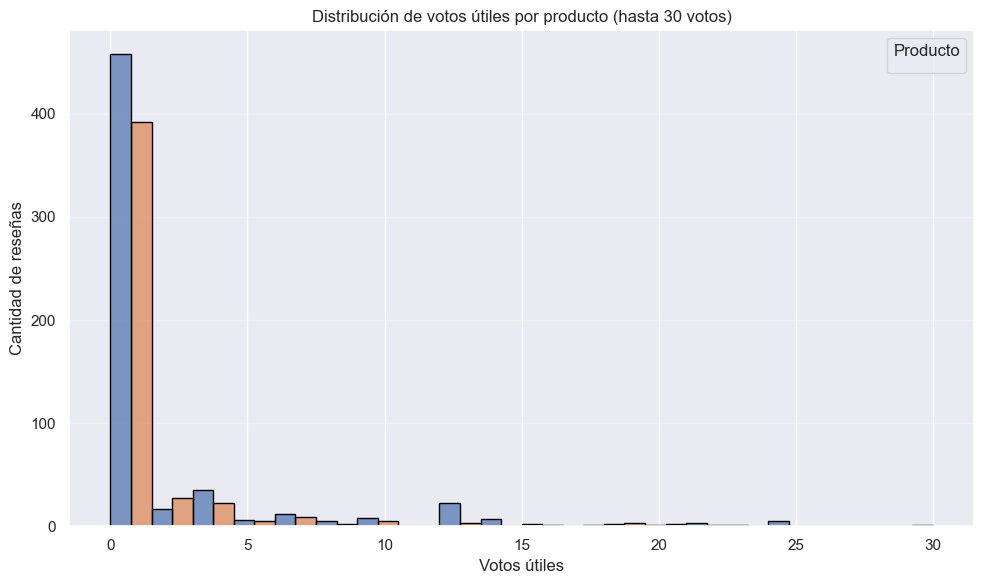

In [12]:
# Distribución por producto
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_filtered,
    x='useful_votes',
    hue='producto',
    multiple='dodge',
    bins=20,
    edgecolor='black',
    alpha=0.7
)

plt.title('Distribución de votos útiles por producto (hasta 30 votos)')
plt.xlabel('Votos útiles')
plt.ylabel('Cantidad de reseñas')
plt.legend(title='Producto')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()

plt.savefig('../outputs/visualizations/01_grafico_votos_utiles_por_producto.png', dpi=300, bbox_inches='tight')
plt.show()

### 🔗 Relación entre longitud de reseña y votos útiles

Análisis de la correlación entre la extensión de las reseñas y la cantidad de votos útiles recibidos.

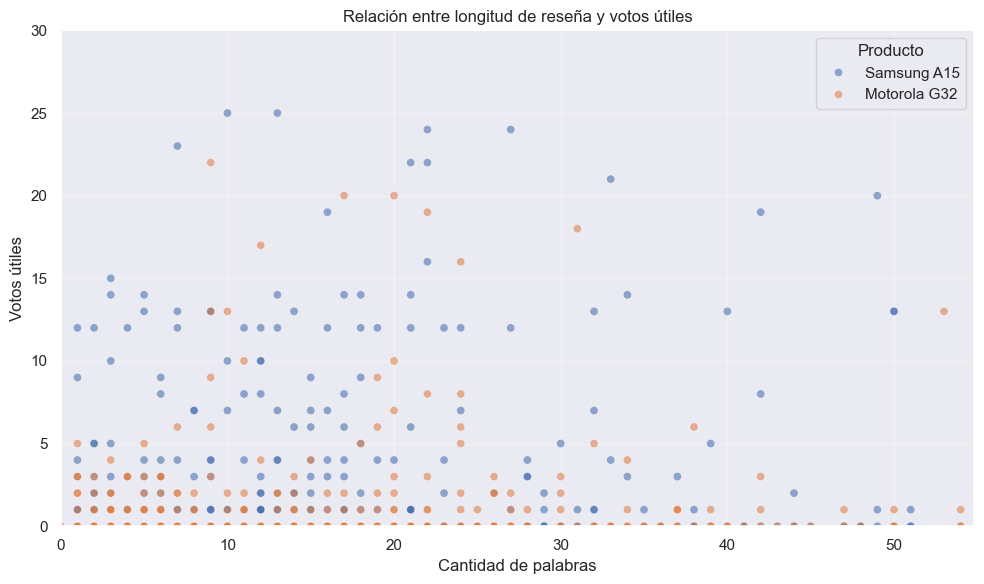

In [13]:
# Scatter plot: longitud vs votos útiles
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_filtered,
    x='word_count',
    y='useful_votes',
    hue='producto',
    alpha=0.6
)

plt.title('Relación entre longitud de reseña y votos útiles')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Votos útiles')
plt.legend(title='Producto')
plt.grid(True, alpha=0.3)

# Limitar ejes para mejor visualización
plt.xlim(0, df_total['word_count'].quantile(0.95))
plt.ylim(0, 30)

plt.tight_layout()
plt.savefig('../outputs/visualizations/01_grafico_longitud_vs_votos.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Resumen estadístico del análisis exploratorio

### 📋 Estadísticas generales por producto

In [14]:
# Resumen estadístico por producto
summary_stats = df_total.groupby('producto').agg({
    'rating': ['count', 'mean', 'std'],
    'word_count': ['mean', 'median', 'std'],
    'useful_votes': ['mean', 'median', 'max']
}).round(2)

# Aplanar columnas multinivel
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns]

# Renombrar columnas para mayor claridad
summary_stats = summary_stats.rename(columns={
    'rating_count': 'total_reseñas',
    'rating_mean': 'rating_promedio',
    'rating_std': 'rating_desv_std',
    'word_count_mean': 'palabras_promedio',
    'word_count_median': 'palabras_mediana',
    'word_count_std': 'palabras_desv_std',
    'useful_votes_mean': 'votos_promedio',
    'useful_votes_median': 'votos_mediana',
    'useful_votes_max': 'votos_maximo'
})

print("📊 Resumen estadístico por producto:")
print(summary_stats.T)  # Transponer para mejor visualización

📊 Resumen estadístico por producto:
producto           Motorola G32  Samsung A15
total_reseñas            487.00       598.00
rating_promedio            3.95         3.51
rating_desv_std            1.11         1.36
palabras_promedio         19.03        16.58
palabras_mediana          12.00        12.00
palabras_desv_std         22.99        18.47
votos_promedio             3.96         4.92
votos_mediana              0.00         0.00
votos_maximo             346.00       617.00


## 📝 Conclusiones del análisis exploratorio

### Hallazgos principales:

1. **Distribución temporal**: Se observan patrones diferentes de adopción y comentarios entre los productos.

2. **Calificaciones**: Ambos productos muestran distribuciones de ratings que reflejan la satisfacción general de los usuarios.

3. **Longitud de reseñas**: Existe una relación interesante entre la calificación otorgada y la extensión de los comentarios.

4. **Engagement**: Los votos útiles proporcionan insights sobre qué tipo de reseñas la comunidad considera más valiosas.

Estos hallazgos establecen la base para el análisis de contenido textual (NLP) que se realizará en el siguiente notebook.